In [6]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


In [10]:
! pip install matplotlib

     |████████████████████████████████| 9.2 MB 19.1 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 63.3 MB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 56.5 MB/s eta 0:00:01
     |████████████████████████████████| 103 kB 68.4 MB/s eta 0:00:01
     |████████████████████████████████| 4.6 MB 64.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 64.9 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [11]:
! pip install seaborn

     |████████████████████████████████| 294 kB 19.2 MB/s eta 0:00:01


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data = pd.read_csv('/config/workspace/Dataset/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

We can see there few data for columns Glucose , Insulin, skin thickenss, BMI and Blood Pressure which have value as 0. That's not possible,right? you can do a quick search to see that one cannot have 0 values for these.
Let's deal with that. we can either remove such data or simply replace it with their respective mean values.
Let's do the latter.

In [17]:
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

<Axes: >

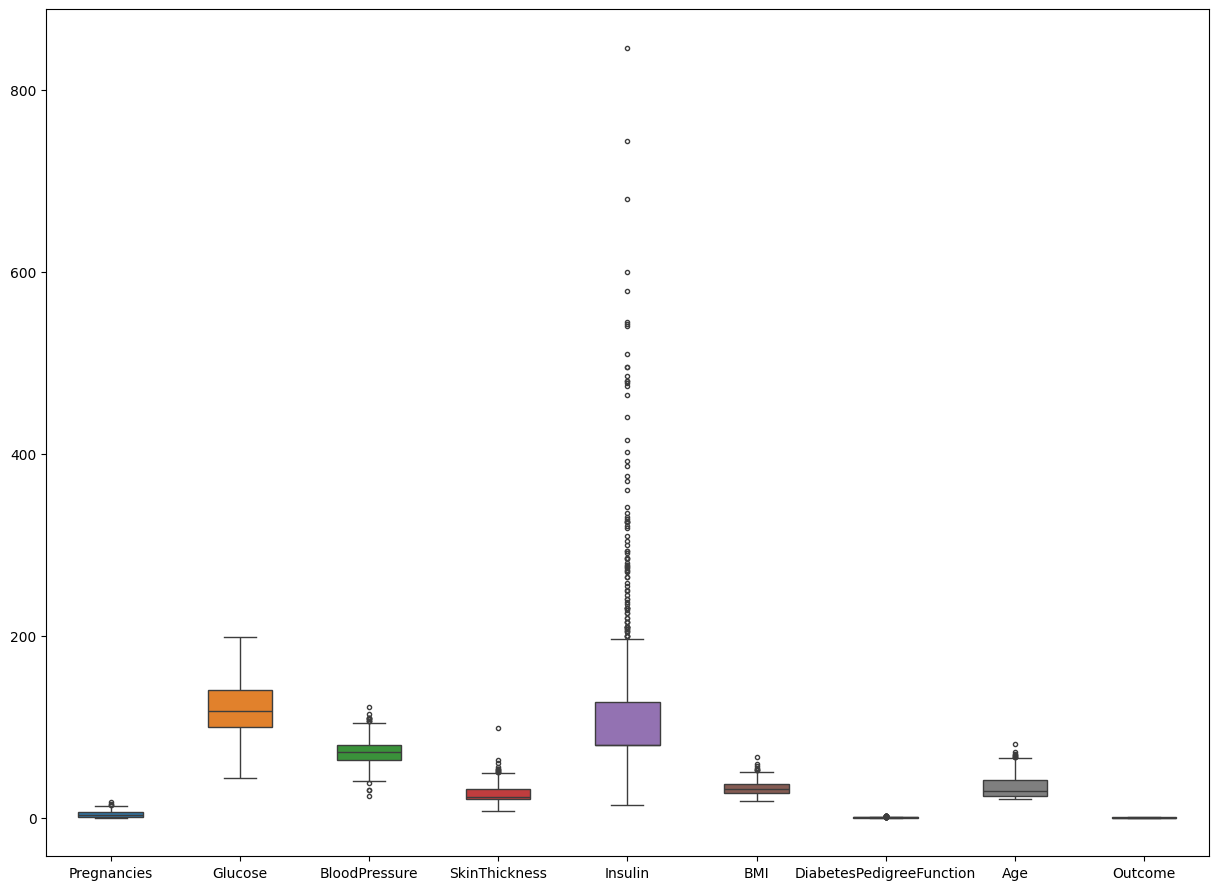

In [23]:
fig,ax = plt.subplots(figsize=(15,11))
sns.boxplot(data=data,width=0.5,ax=ax,fliersize=3)

In [24]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [25]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((576, 8), (192, 8), (576,), (192,))

In [27]:
import pickle

def scaler_standard(X_train,X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    file = open('/config/workspace/Models/StandardScaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close()

    return X_train_scaled,X_test_scaled

In [29]:
X_train_scaled,X_test_scaled = scaler_standard(X_train,X_test)

In [30]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train_scaled,y_train)

LogisticRegression()

In [33]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

parameters = {
    'penalty' : ('l1','l2'),
    'C':np.logspace(-3,3,7),
    'solver' : ('newton-cg','lbfgs','liblinear')
}

In [34]:
logistic_Reg = LogisticRegression()
clf = GridSearchCV(logistic_Reg,param_grid=parameters,scoring='accuracy',cv=10)
clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ('l1', 'l2'),
                         'solver': ('newton-cg', 'lbfgs', 'liblinear')},
             scoring='accuracy')

In [35]:
clf.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [36]:
clf.best_score_

0.763793103448276

In [37]:
y_predicted = clf.predict(X_test_scaled)

In [38]:
confusion = confusion_matrix(y_test,y_predicted)
confusion

array([[117,  13],
       [ 26,  36]])

In [41]:
true_positive = confusion[0][0]
false_positive = confusion[0][1]
false_nagitive = confusion[1][0]
true_nagitive = confusion[1][1]

In [42]:
Acc = (true_positive + true_negative) / (true_positive + true_nagitive + false_nagitive + false_positive)
Acc

0.796875

In [43]:
Precision = (true_positive) / (true_positive + false_positive)
Precision

0.9

In [44]:
Recall = (true_positive) / (true_positive + false_nagitive)
Recall

0.8181818181818182

In [45]:
F1_Score = (1 + 1**2 ) * ((Precision * Recall) / (Precision + Recall))
F1_Score

0.8571428571428572

In [46]:
import pickle
file = open('/config/workspace/Models/LogisticRegression.pkl','wb')
pickle.dump(logistic_reg,file)
file.close()